In [1]:
import sys
sys.path.append("..")

from io import StringIO
import pandas as pd
from src.seed_points.board import Board
import matplotlib.pyplot as plt
from shapely import affinity
from src.data_structures import Point
from src.puzzle_creators.all_partition import AllPartitionsCreator
import os

board.frame_anchor_points 5
board.interior_points 2


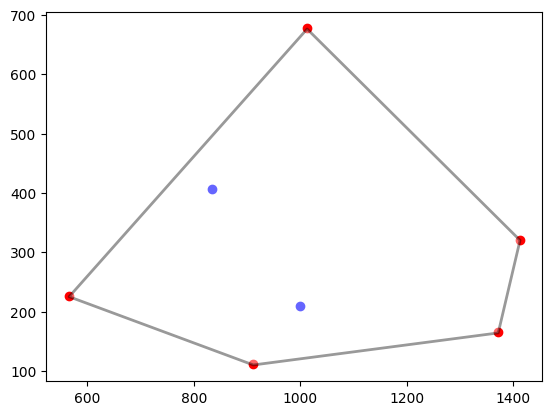

In [2]:
notebook_path = "../data/tmp/notebook_7"

sampling_path = os.path.join(notebook_path,"CH-5-INT-2-16-12-17.csv")

board = Board(file_path=sampling_path)
print("board.frame_anchor_points",len(board.frame_anchor_points))
print("board.interior_points",len(board.interior_points))

ax = plt.subplot()
board.plot(ax)
plt.show()



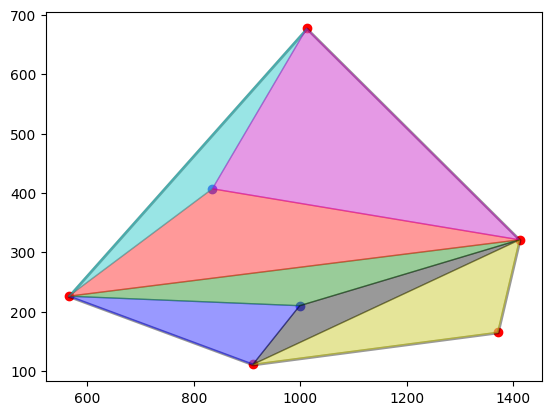

In [3]:
puzzles_dst_folder = os.path.join(notebook_path,"CH-5-INT-2-16-12-17")
result_path = os.path.join(puzzles_dst_folder,"results")
dirs_to_create = [puzzles_dst_folder,result_path]

for _dir in dirs_to_create:
    if not os.path.exists(_dir):
        os.makedirs(_dir)

creator = AllPartitionsCreator(board,puzzles_dst_folder)
creator.run()

In [4]:
len(list(os.listdir(result_path)))

93

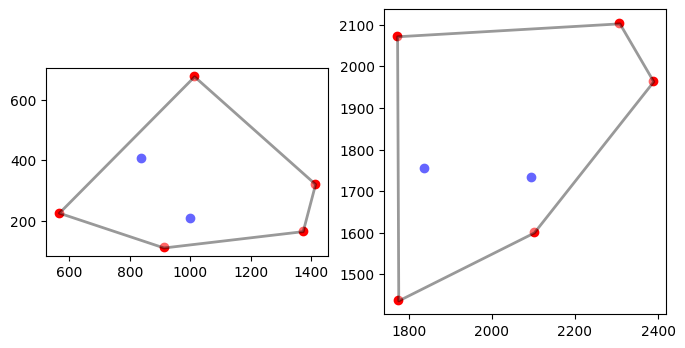

In [12]:
rotation_angle = 45
tx = 1000
ty = 1500

interiors = [Point(poi.x,poi.y) for poi in board.interior_points]
frame = [Point(poi.x,poi.y) for poi in board.frame_anchor_points]

interiors = [affinity.rotate(poi,rotation_angle,origin=board.frame_polygon.centroid) for poi in board.interior_points]
frame = [affinity.rotate(poi,rotation_angle,origin=board.frame_polygon.centroid) for poi in board.frame_anchor_points]

interiors = [affinity.translate(poi,tx,ty) for poi in interiors]
frame = [affinity.translate(poi,tx,ty) for poi in frame]

interiors = [Point(poi.x,poi.y) for poi in interiors]
frame = [Point(poi.x,poi.y) for poi in frame]

transformed_board = Board(interior_points=interiors,convex_hull_points=frame)
fig,axs = plt.subplots(1,2,figsize=(8,10))
axs[0].set_aspect("equal")
axs[1].set_aspect("equal")
board.plot(axs[0])
transformed_board.plot(axs[1])

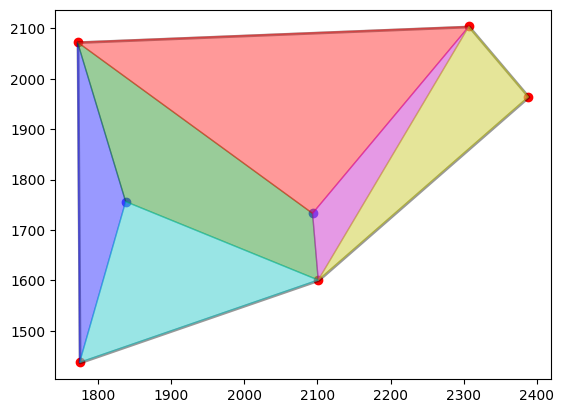

In [13]:
puzzles_dst_folder = os.path.join(notebook_path,"Transformed CH-5-INT-2-16-12-17")

result_path = os.path.join(puzzles_dst_folder,"results")
dirs_to_create = [puzzles_dst_folder,result_path]

for _dir in dirs_to_create:
    if not os.path.exists(_dir):
        os.makedirs(_dir)

creator = AllPartitionsCreator(transformed_board,puzzles_dst_folder)
creator.run()

In [14]:
len(list(os.listdir(result_path)))

93